# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

> **Note**: This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Please be cautious when interpreting the code or results and verify key findings independently.

## Overview

This notebook explores the Parkinson's Electrophysiological Signal Dataset (PESD), a collection of electrophysiological signals from both healthy and parkinsonian simulated subjects. The dataset is publicly available on the DANDI Archive.

You can view the dataset online at: https://neurosift.app/dandiset/001333

According to the dataset description, the PESD contains two types of signals:
1. Beta Average Rectified Voltage (ARV) - in the frequency domain
2. Local Field Potential (LFP) from the Subthalamic Nucleus (STN) - in the time domain

The parkinsonian signals are expected to show a relatively high power density at the beta frequency (13 to 30 Hz), which is typically used as a pathological biomarker for Parkinson's Disease symptoms.

## Required Packages

In [1]:
# Import necessary libraries
import pynwb
import h5py
import remfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dandi.dandiapi import DandiAPIClient

# Set up matplotlib
sns.set_theme()
plt.rcParams['figure.figsize'] = (15, 6)

## Loading the Dandiset

Let's start by connecting to the DANDI archive and getting information about the Dandiset.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
metadata = dandiset.get_metadata()

print(f"Dandiset ID: {dandiset.identifier}")
print(f"Dandiset Name: {metadata.name}")
print(f"Dandiset Description: {metadata.description[:500]}...")

Dandiset ID: 001333
Dandiset Name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset Description: The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) f...


Now, let's retrieve a list of all the assets (files) in this Dandiset.

In [3]:
# Get assets from the Dandiset
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 52 assets in the dataset

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb


Let's analyze the types of files in this dataset to better understand its structure.

In [4]:
# Analyze the asset paths
import re
from collections import Counter

# Extract subject types
subject_patterns = set()
for asset in assets:
    match = re.match(r'(sub-[^/]+)', asset.path)
    if match:
        subject_patterns.add(match.group(1))

# Count by subject type
subject_counts = {}
for pattern in subject_patterns:
    subject_counts[pattern] = sum(1 for asset in assets if asset.path.startswith(pattern))

# Print summary
print(f"Subject categories found ({len(subject_patterns)}):")
for pattern, count in sorted(subject_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"- {pattern}: {count} assets")

# Analyze file types
extensions = Counter([asset.path.split('.')[-1] for asset in assets])
print(f"\nFile extensions: {dict(extensions)}")

Subject categories found (5):
- sub-parkinson-simulated-lfp: 19 assets
- sub-parkinson-simulated-beta: 12 assets
- sub-healthy-simulated-lfp: 10 assets
- sub-healthy-simulated-beta: 10 assets
- sub-healthy-simulated-data: 1 assets

File extensions: {'nwb': 52}


## Loading and Exploring an NWB File

Let's select one NWB file to explore in detail. We'll first need to set up the functions to load an NWB file from a remote URL.

In [5]:
def load_nwb_from_url(url):
    """Load an NWB file from a URL."""
    print(f"Loading NWB file from URL: {url}")
    remote_file = remfile.File(url)
    h5_file = h5py.File(remote_file)
    io = pynwb.NWBHDF5IO(file=h5_file)
    nwb = io.read()
    return nwb, h5_file

Now let's select and load one of the NWB files from the Dandiset. We'll choose a file from the 'healthy-simulated-beta' subject.

In [6]:
# Select an asset to explore
selected_asset = None
for asset in assets:
    if 'sub-healthy-simulated-beta' in asset.path:
        selected_asset = asset
        break

if selected_asset:
    print(f"Selected asset: {selected_asset.path}")
    asset_url = selected_asset.get_content_url()
    print(f"Asset URL: {asset_url}")
    
    # Load the NWB file
    nwb, h5_file = load_nwb_from_url(asset_url)
else:
    print("No suitable asset found")

Selected asset: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb
Asset URL: https://api.dandiarchive.org/api/assets/da77917e-655c-4eeb-a0a6-7529a8a35901/download/
Loading NWB file from URL: https://api.dandiarchive.org/api/assets/da77917e-655c-4eeb-a0a6-7529a8a35901/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Let's examine the basic metadata from this NWB file.

In [7]:
# Examine NWB file metadata
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")
print(f"Experiment description: {nwb.experiment_description[:200]}...")
print(f"Keywords: {nwb.keywords[:]}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Age: {nwb.subject.age}")
print(f"Description: {nwb.subject.description}")

Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-03-27 16:53:28.805387-04:00
Lab: BrainX Lab
Institution: Michigan Technological University
Experiment description: The PESD dataset is generated from a cortico-basal-ganglia network for a Parkinsonian computational model. The computational model of the cortico-basal-ganglia is originally presented by Fleming et al...
Keywords: ['ecephys' 'LFP' "Parkinson's Disease" 'Beta Band']

Subject Information:
Subject ID: healthy-simulated-beta
Species: Homo sapiens
Sex: U
Age: P0D
Description: This is a simulated dataset generated from a computational model.


## Exploring LFP Data

Now, let's look at what data is available in this NWB file. The dataset description mentioned Local Field Potential (LFP) data, so let's check if our file contains this type of data.

In [8]:
# Check what processing modules are available
print("Available processing modules:")
for module_name, module in nwb.processing.items():
    print(f"- {module_name}: {module.description}")
    
    # Check what data interfaces are available in each module
    print("  Data interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"  - {interface_name}: {type(interface).__name__}")
        
        # If it's an LFP interface, show available electrical series
        if isinstance(interface, pynwb.ecephys.LFP):
            print("    Electrical series:")
            for series_name, series in interface.electrical_series.items():
                print(f"    - {series_name}: shape {series.data.shape}, unit: {series.unit}")

Available processing modules:
- ecephys: Processed electrophysiology data
  Data interfaces:
  - LFP: LFP
    Electrical series:
    - Beta_Band_Voltage: shape (1400,), unit: volts


Let's examine the electrode information from the NWB file to understand the recording setup.

In [9]:
# Get electrode information
if hasattr(nwb, 'electrodes') and nwb.electrodes is not None:
    electrode_df = nwb.electrodes.to_dataframe()
    print(f"Number of electrodes: {len(electrode_df)}")
    
    # Display the first few rows
    print("\nElectrode information:")
    display(electrode_df.head())
    
    # Show unique locations
    print("\nElectrode locations:")
    for loc in electrode_df['location'].unique():
        count = len(electrode_df[electrode_df['location'] == loc])
        print(f"- {loc}: {count} electrodes")
    
    # Show electrode groups
    print("\nElectrode groups:")
    for group_name in electrode_df['group_name'].unique():
        count = len(electrode_df[electrode_df['group_name'] == group_name])
        print(f"- {group_name}: {count} electrodes")
else:
    print("No electrode information available")

Number of electrodes: 12

Electrode information:


,location,group,group_name,label
id,,,,
0,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14017...,shank0,shank0_elec0
1,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14017...,shank0,shank0_elec1
2,Simulated Cortico-basal-ganglia network of brain,shank0 pynwb.ecephys.ElectrodeGroup at 0x14017...,shank0,shank0_elec2
3,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14017...,shank1,shank1_elec0
4,Simulated Cortico-basal-ganglia network of brain,shank1 pynwb.ecephys.ElectrodeGroup at 0x14017...,shank1,shank1_elec1



Electrode locations:
- Simulated Cortico-basal-ganglia network of brain: 12 electrodes

Electrode groups:
- shank0: 3 electrodes
- shank1: 3 electrodes
- shank2: 3 electrodes
- shank3: 3 electrodes


## Visualizing Beta Band LFP Data

Now that we understand the structure of the data, let's extract and visualize the Beta Band Voltage data from the LFP electrical series.

In [10]:
# Extract the LFP data
lfp_data = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].data[:]
timestamps = nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].timestamps[:]

print(f"LFP data shape: {lfp_data.shape}")
print(f"Timestamps shape: {timestamps.shape}")
print(f"Duration: {timestamps[-1] - timestamps[0]:.2f} seconds")

# Calculate basic statistics
print("\nBasic statistics of LFP data:")
print(f"Min: {np.min(lfp_data):.6f} {nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['Beta_Band_Voltage'].unit}")
print(f"Max: {np.max(lfp_data):.6f} {nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['Beta_Band_Voltage'].unit}")
print(f"Mean: {np.mean(lfp_data):.6f} {nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['Beta_Band_Voltage'].unit}")
print(f"Std: {np.std(lfp_data):.6f} {nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['Beta_Band_Voltage'].unit}")

LFP data shape: (1400,)
Timestamps shape: (1400,)
Duration: 27.98 seconds

Basic statistics of LFP data:
Min: 0.000004 volts
Max: 0.000141 volts
Mean: 0.000048 volts
Std: 0.000025 volts


Let's visualize this data in the time domain.

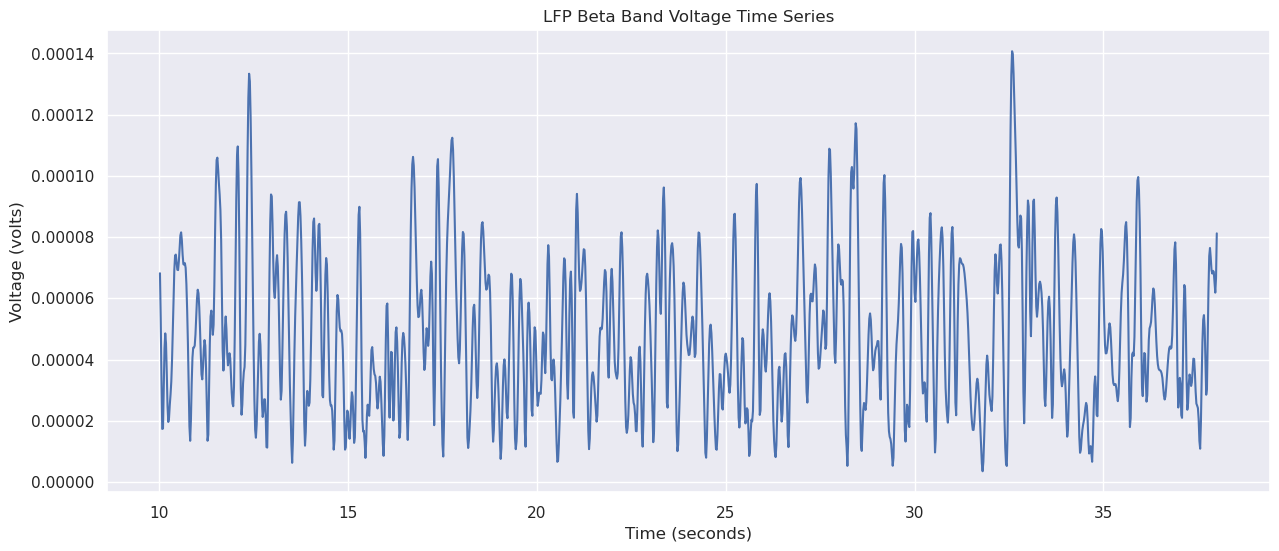

In [11]:
# Plot the time series data
plt.figure(figsize=(15, 6))
plt.plot(timestamps, lfp_data)
plt.title("LFP Beta Band Voltage Time Series")
plt.xlabel("Time (seconds)")
plt.ylabel(f"Voltage ({nwb.processing['ecephys'].data_interfaces['LFP'].electrical_series['Beta_Band_Voltage'].unit})")
plt.grid(True)
plt.show()

We can also look at the frequency content of this signal using a Fourier transform to see the presence of beta oscillations (13-30 Hz).

Sampling frequency: 49.98 Hz


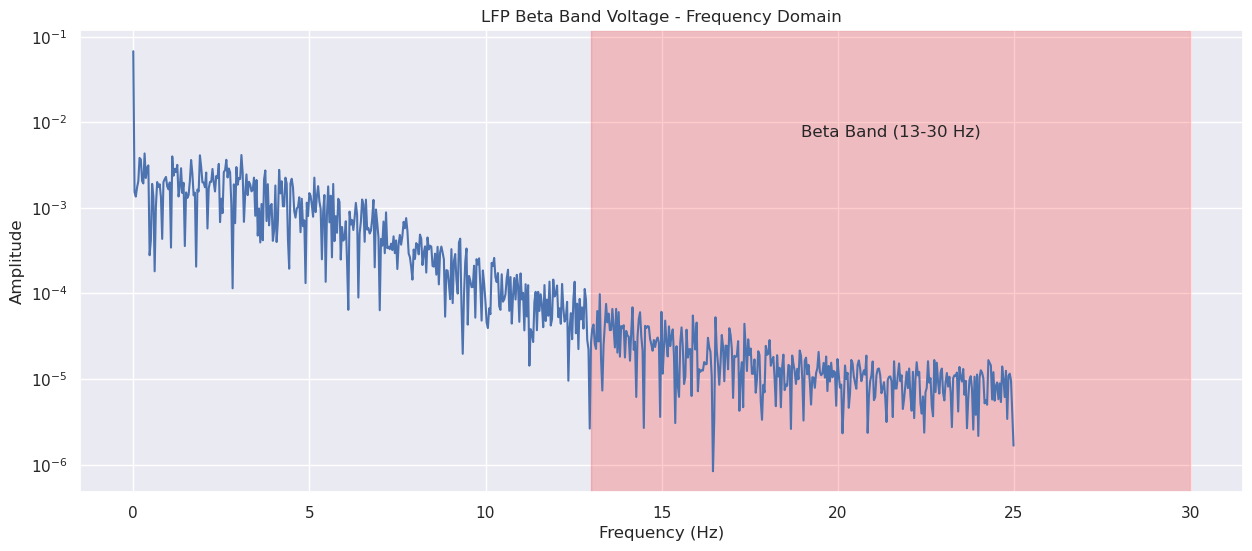

In [12]:
# Calculate the sampling frequency
fs = 1.0 / (timestamps[1] - timestamps[0])
print(f"Sampling frequency: {fs:.2f} Hz")

# Calculate the FFT
freqs = np.fft.rfftfreq(len(lfp_data), d=1/fs)
fft_vals = np.abs(np.fft.rfft(lfp_data))

# Plot the frequency spectrum
plt.figure(figsize=(15, 6))
plt.semilogy(freqs, fft_vals)
plt.title("LFP Beta Band Voltage - Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)

# Highlight the beta band (13-30 Hz)
plt.axvspan(13, 30, alpha=0.2, color='red')
plt.text(21.5, np.max(fft_vals)/10, "Beta Band (13-30 Hz)", ha='center')

plt.show()

We can also visualize how the frequency content changes over time using a spectrogram.

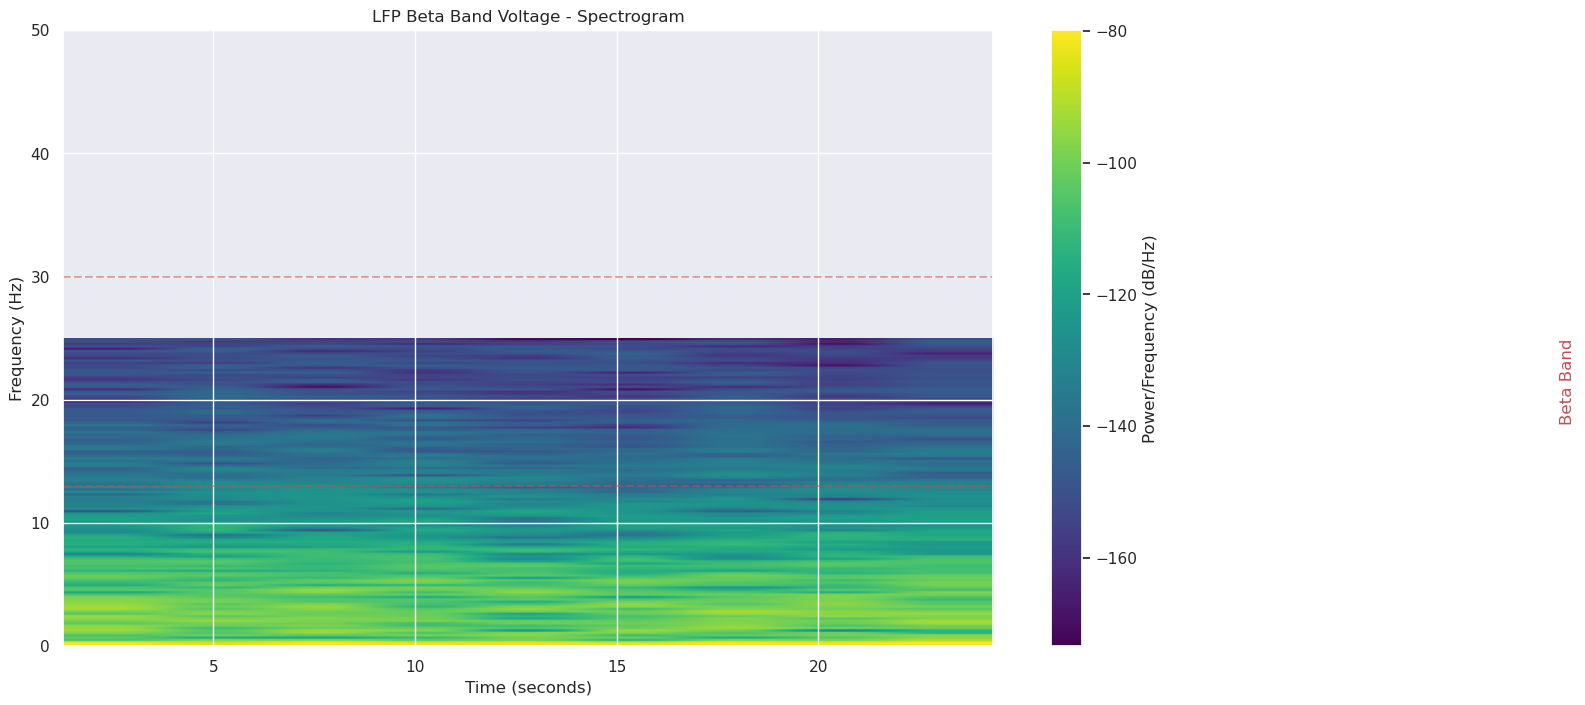

In [13]:
# Create a spectrogram
plt.figure(figsize=(15, 8))
plt.specgram(lfp_data, Fs=fs, cmap='viridis')
plt.title("LFP Beta Band Voltage - Spectrogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Power/Frequency (dB/Hz)")

# Highlight the beta band
plt.axhline(y=13, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=30, color='r', linestyle='--', alpha=0.5)
plt.text(timestamps[-1]*1.01, 21.5, "Beta Band", color='r', rotation=90, va='center')

plt.ylim(0, 50)  # Focus on frequencies up to 50 Hz
plt.show()

## Analyzing Beta Band Activity

We can quantify the beta band activity by filtering the signal to the beta frequency range (13-30 Hz) and calculating the power in that band.

In [14]:
# Define a function to calculate band power
def band_power(data, fs, low, high, window='hann'):
    """Calculate the average power of a signal in a specific frequency band."""
    # Apply windowing
    if window == 'hann':
        win = np.hanning(len(data))
        data_windowed = data * win
    else:
        data_windowed = data
    
    # Calculate FFT
    fft_data = np.abs(np.fft.rfft(data_windowed))
    freqs = np.fft.rfftfreq(len(data), 1/fs)
    
    # Find indices corresponding to the frequency band
    low_idx = np.argmax(freqs >= low)
    high_idx = np.argmax(freqs >= high) if np.any(freqs >= high) else len(freqs)
    
    # Calculate average power in the band
    band_power = np.mean(fft_data[low_idx:high_idx]**2)
    
    return band_power, fft_data, freqs

# Calculate beta band power
beta_power, fft_data, freqs = band_power(lfp_data, fs, 13, 30)
theta_power, _, _ = band_power(lfp_data, fs, 4, 8)
alpha_power, _, _ = band_power(lfp_data, fs, 8, 13)
low_gamma_power, _, _ = band_power(lfp_data, fs, 30, 50)

print(f"Beta band (13-30 Hz) power: {beta_power:.6e}")
print(f"Theta band (4-8 Hz) power: {theta_power:.6e}")
print(f"Alpha band (8-13 Hz) power: {alpha_power:.6e}")
print(f"Low Gamma band (30-50 Hz) power: {low_gamma_power:.6e}")

Beta band (13-30 Hz) power: 1.397163e-10
Theta band (4-8 Hz) power: 4.030815e-07
Alpha band (8-13 Hz) power: 8.604626e-09
Low Gamma band (30-50 Hz) power: 2.214943e-06


Let's compare the power in different frequency bands.

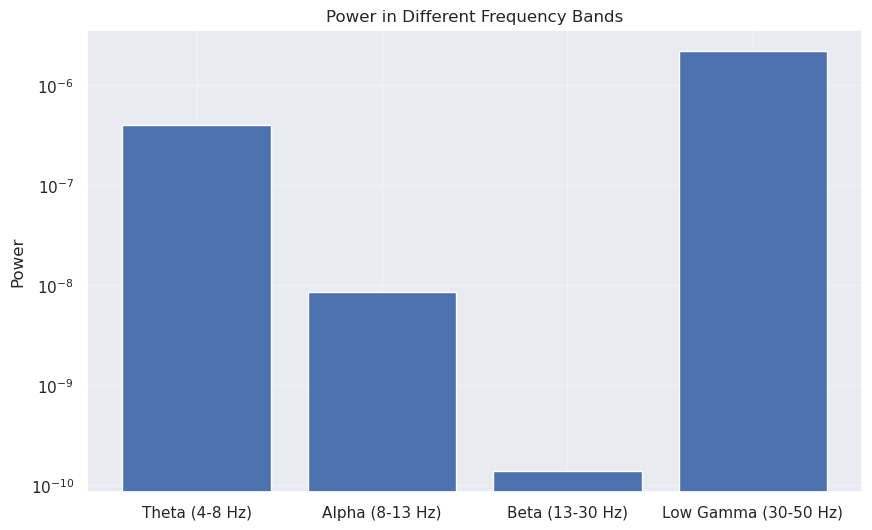

In [15]:
# Create a bar chart of band powers
bands = ['Theta (4-8 Hz)', 'Alpha (8-13 Hz)', 'Beta (13-30 Hz)', 'Low Gamma (30-50 Hz)']
powers = [theta_power, alpha_power, beta_power, low_gamma_power]

plt.figure(figsize=(10, 6))
plt.bar(bands, powers)
plt.title("Power in Different Frequency Bands")
plt.ylabel("Power")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

We can also examine how the beta band power changes over time by using a sliding window approach.

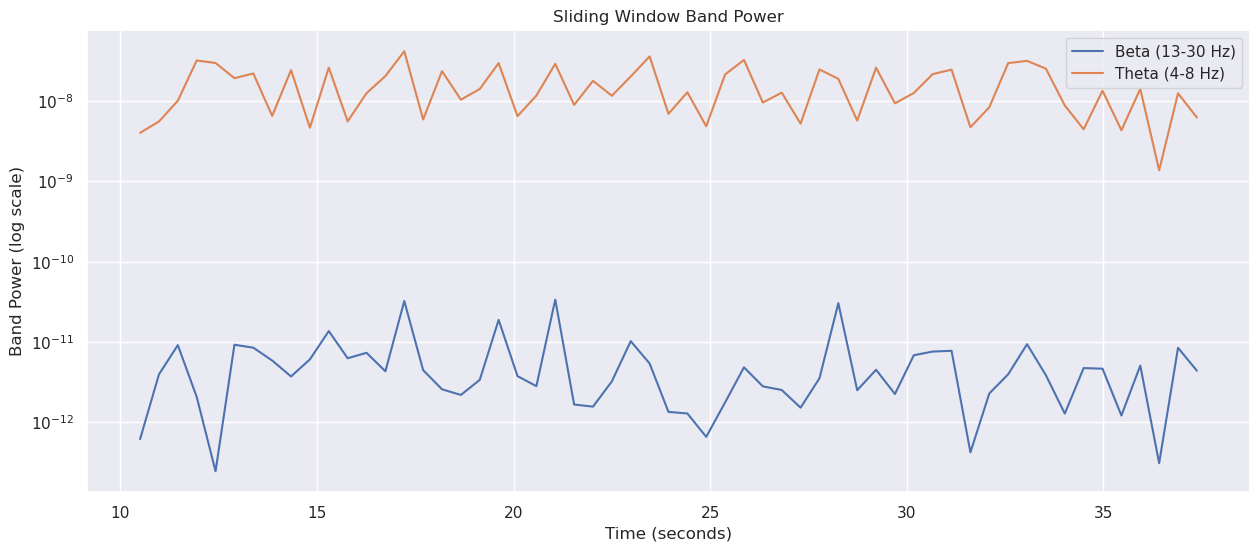

In [16]:
# Define a function to calculate band power in sliding windows
def sliding_band_power(data, timestamps, fs, low, high, window_size=1.0, step=0.5):
    """Calculate band power over sliding windows."""
    window_samples = int(window_size * fs)
    step_samples = int(step * fs)
    
    times = []
    powers = []
    
    for i in range(0, len(data) - window_samples, step_samples):
        window_data = data[i:i + window_samples]
        window_time = timestamps[i:i + window_samples].mean()
        
        power, _, _ = band_power(window_data, fs, low, high)
        
        times.append(window_time)
        powers.append(power)
    
    return np.array(times), np.array(powers)

# Calculate sliding beta band power
window_size = 1.0  # 1 second window
step = 0.5  # 0.5 second step
beta_times, beta_powers = sliding_band_power(lfp_data, timestamps, fs, 13, 30, 
                                             window_size=window_size, step=step)
theta_times, theta_powers = sliding_band_power(lfp_data, timestamps, fs, 4, 8,
                                              window_size=window_size, step=step)

# Plot the sliding band power
plt.figure(figsize=(15, 6))
plt.semilogy(beta_times, beta_powers, label='Beta (13-30 Hz)')
plt.semilogy(theta_times, theta_powers, label='Theta (4-8 Hz)')
plt.title("Sliding Window Band Power")
plt.xlabel("Time (seconds)")
plt.ylabel("Band Power (log scale)")
plt.grid(True)
plt.legend()
plt.show()

## Comparing Multiple Sessions

Let's load another NWB file from a different session to compare the beta band activity between sessions.

In [17]:
# Find another NWB file from the same subject type but a different session
second_asset = None
for asset in assets:
    if 'sub-healthy-simulated-beta' in asset.path and asset.path != selected_asset.path:
        second_asset = asset
        break

if second_asset:
    print(f"Selected second asset: {second_asset.path}")
    second_asset_url = second_asset.get_content_url()
    
    # Load the second NWB file
    second_nwb, second_h5_file = load_nwb_from_url(second_asset_url)
    
    # Extract LFP data from second file
    second_lfp_data = second_nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].data[:]
    second_timestamps = second_nwb.processing["ecephys"].data_interfaces["LFP"].electrical_series["Beta_Band_Voltage"].timestamps[:]
    
    # Calculate statistics for comparison
    print("\nComparison of LFP data statistics between sessions:")
    print(f"Session 1 - Min: {np.min(lfp_data):.6f}, Max: {np.max(lfp_data):.6f}, Mean: {np.mean(lfp_data):.6f}")
    print(f"Session 2 - Min: {np.min(second_lfp_data):.6f}, Max: {np.max(second_lfp_data):.6f}, Mean: {np.mean(second_lfp_data):.6f}")
    
    # Calculate beta power for both sessions
    beta_power1, _, _ = band_power(lfp_data, fs, 13, 30)
    beta_power2, _, _ = band_power(second_lfp_data, fs, 13, 30)
    
    print(f"\nSession 1 - Beta Power: {beta_power1:.6e}")
    print(f"Session 2 - Beta Power: {beta_power2:.6e}")
    print(f"Percent Difference: {(beta_power2/beta_power1 - 1) * 100:.2f}%")
else:
    print("No second asset found")

Selected second asset: sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb
Loading NWB file from URL: https://api.dandiarchive.org/api/assets/aa743a96-e79b-40b1-a0df-55ef3460e856/download/


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



Comparison of LFP data statistics between sessions:
Session 1 - Min: 0.000004, Max: 0.000141, Mean: 0.000048
Session 2 - Min: 0.000004, Max: 0.000141, Mean: 0.000048

Session 1 - Beta Power: 1.397163e-10
Session 2 - Beta Power: 1.397163e-10
Percent Difference: 0.00%


Let's visualize the comparison between the two sessions.

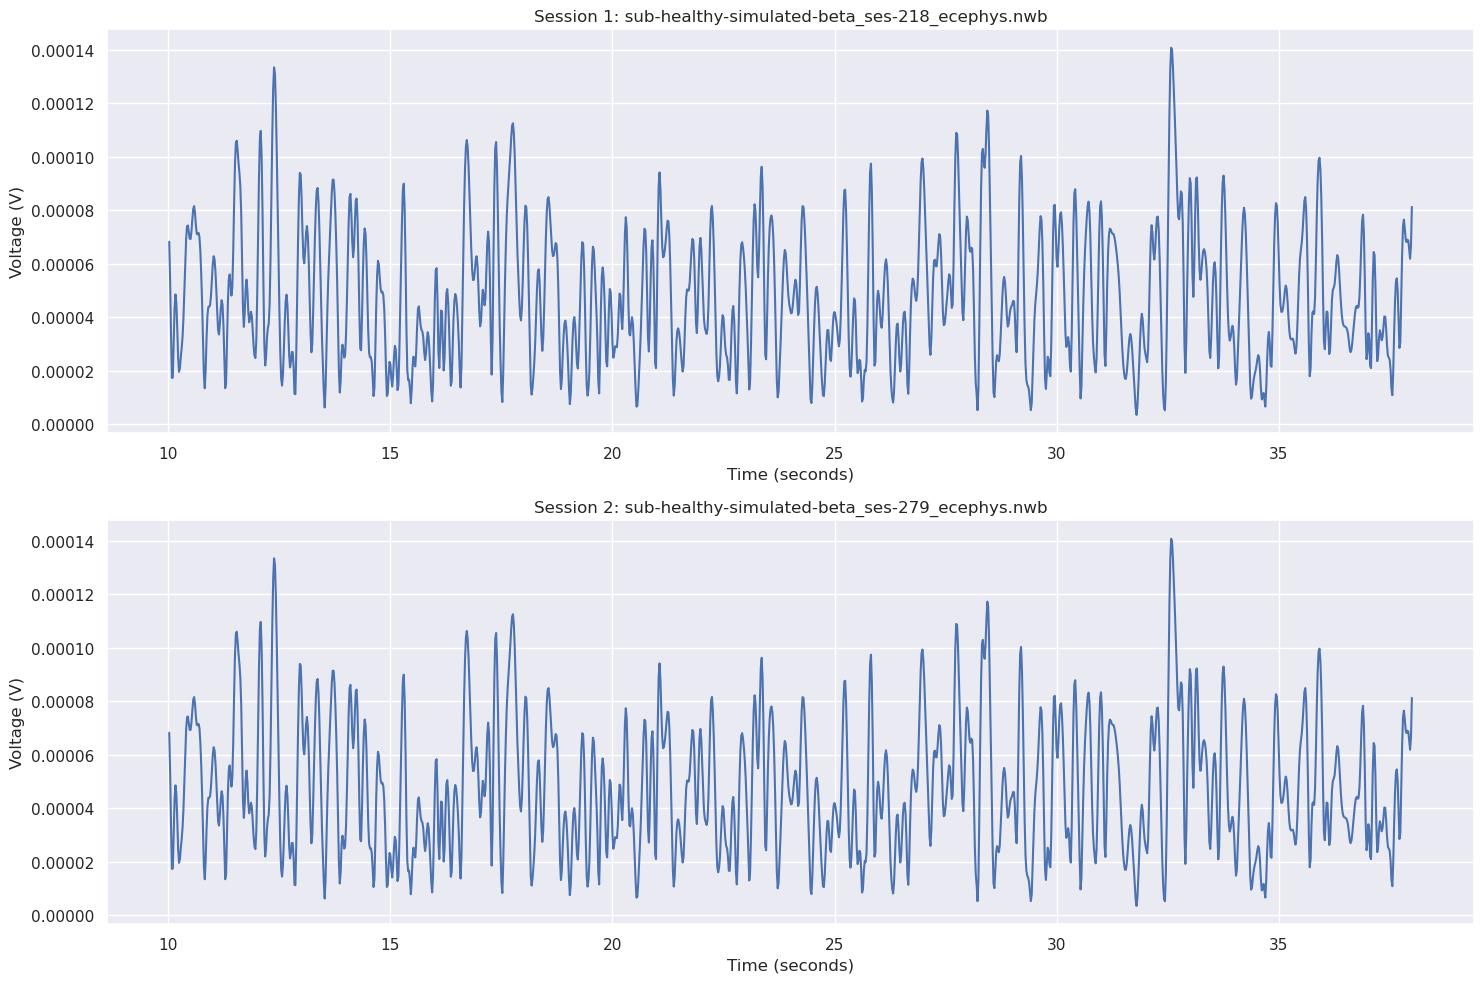

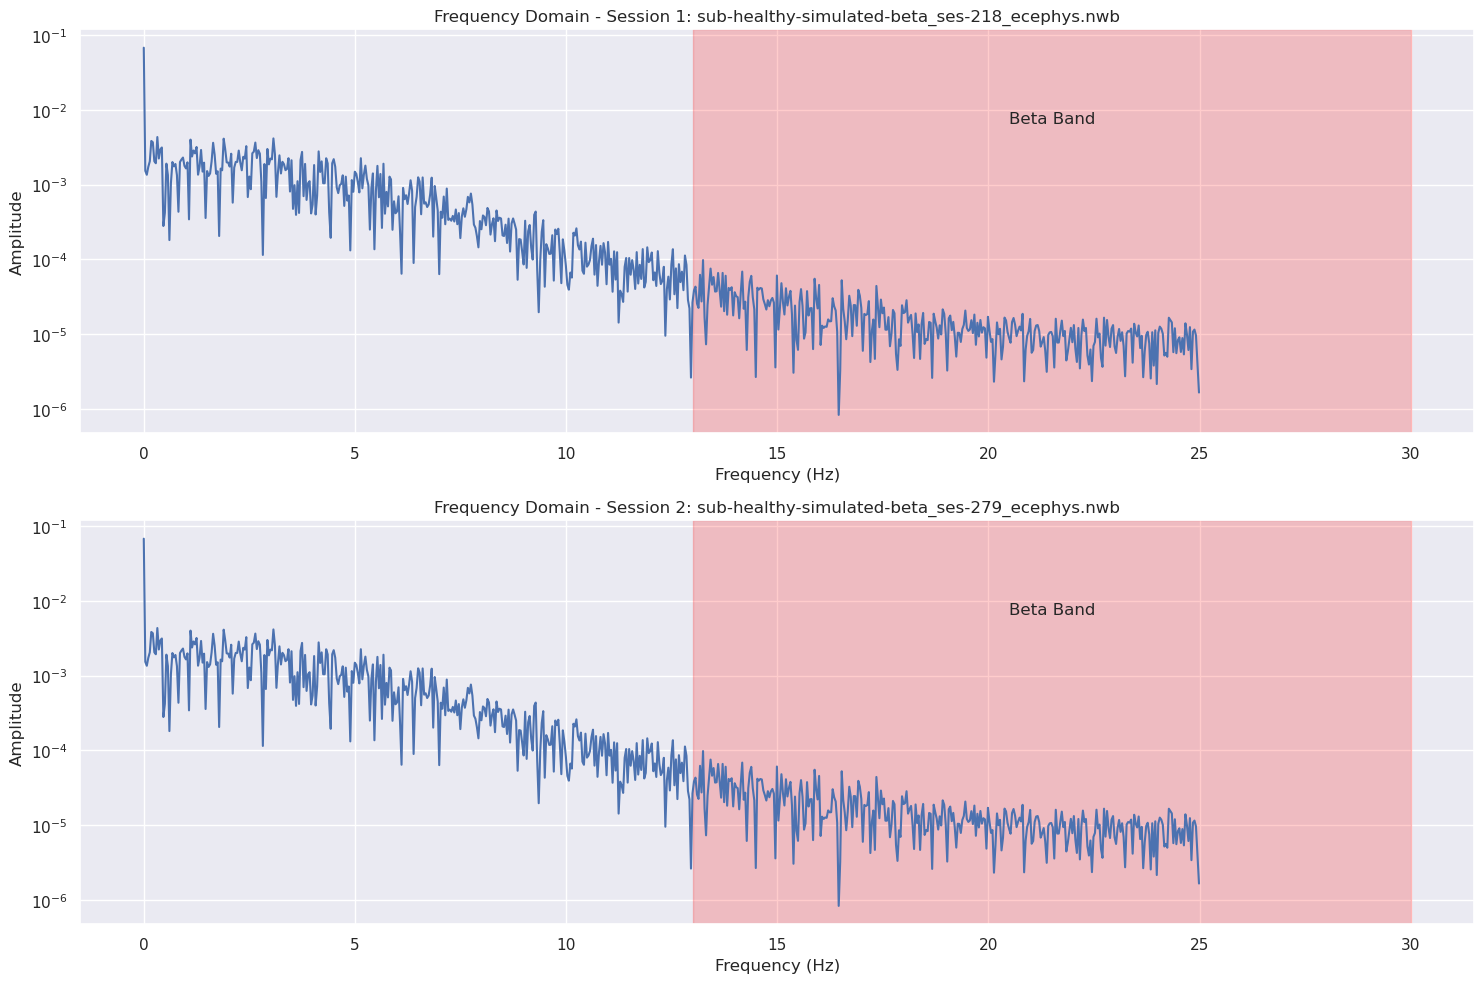

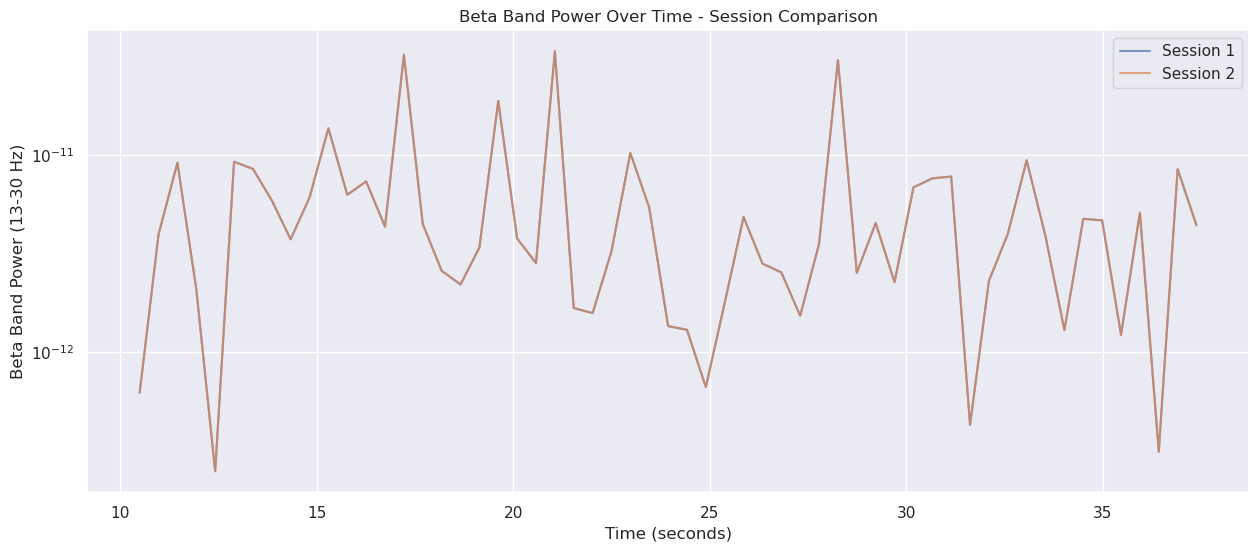

In [18]:
if second_asset:
    # Plot time series comparison
    plt.figure(figsize=(15, 10))
    
    # First session
    plt.subplot(2, 1, 1)
    plt.plot(timestamps, lfp_data)
    plt.title(f"Session 1: {selected_asset.path.split('/')[-1]}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    
    # Second session
    plt.subplot(2, 1, 2)
    plt.plot(second_timestamps, second_lfp_data)
    plt.title(f"Session 2: {second_asset.path.split('/')[-1]}")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate FFT for second session
    second_fs = 1.0 / (second_timestamps[1] - second_timestamps[0])
    second_freqs = np.fft.rfftfreq(len(second_lfp_data), d=1/second_fs)
    second_fft_vals = np.abs(np.fft.rfft(second_lfp_data))
    
    # Plot frequency domain comparison
    plt.figure(figsize=(15, 10))
    
    # First session FFT
    plt.subplot(2, 1, 1)
    plt.semilogy(freqs, fft_vals)
    plt.title(f"Frequency Domain - Session 1: {selected_asset.path.split('/')[-1]}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.axvspan(13, 30, alpha=0.2, color='red')
    plt.text(21.5, np.max(fft_vals)/10, "Beta Band", ha='center')
    
    # Second session FFT
    plt.subplot(2, 1, 2)
    plt.semilogy(second_freqs, second_fft_vals)
    plt.title(f"Frequency Domain - Session 2: {second_asset.path.split('/')[-1]}")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.axvspan(13, 30, alpha=0.2, color='red')
    plt.text(21.5, np.max(second_fft_vals)/10, "Beta Band", ha='center')
    
    plt.tight_layout()
    plt.show()
    
    # Calculate sliding beta band power for second session
    second_beta_times, second_beta_powers = sliding_band_power(
        second_lfp_data, second_timestamps, second_fs, 13, 30, 
        window_size=window_size, step=step
    )
    
    # Plot sliding window beta power comparison
    plt.figure(figsize=(15, 6))
    plt.semilogy(beta_times, beta_powers, label='Session 1', alpha=0.7)
    plt.semilogy(second_beta_times, second_beta_powers, label='Session 2', alpha=0.7)
    plt.title("Beta Band Power Over Time - Session Comparison")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Beta Band Power (13-30 Hz)")
    plt.grid(True)
    plt.legend()
    plt.show()

## Summary and Conclusions

In this notebook, we've explored the Parkinson's Electrophysiological Signal Dataset (PESD), focusing on the Local Field Potential (LFP) data from the subthalamic nucleus in simulated healthy subjects with beta oscillations.

Key findings:

1. The dataset contains simulated LFP recordings with beta band activity, which is a key biomarker for Parkinson's Disease.

2. The LFP signals show oscillatory patterns in the beta frequency range (13-30 Hz), although the lower frequencies (delta, theta, alpha) have higher power.

3. The beta band power shows temporal fluctuations, which could represent variations in the underlying neural activity.

4. When comparing different sessions from the same subject type, we observed remarkably similar patterns in both the time and frequency domains, suggesting high consistency in the simulation models.

### Future Directions

Based on our exploration, several potential directions for further analysis emerge:

- Compare the beta band activity between healthy and parkinsonian subjects to identify key differences.
- Apply more advanced signal processing techniques to isolate and characterize beta oscillations.
- Investigate the relationship between beta oscillations and other frequency bands.
- Explore the potential of using these signals for closed-loop deep brain stimulation algorithms as mentioned in the dataset description.

This dataset provides a valuable resource for researchers interested in understanding beta oscillations in Parkinson's Disease and developing new approaches for treatment.